In [306]:
# Data pre-processing
# Importing libraries 
import numpy as np
import pandas as pd

In [307]:
dataset = pd.read_csv(r"C:/Users/supra/Downloads/archive (6)/airline_passenger_satisfaction.csv")
pd.set_option('display.max_columns', None) #this line is used to display all the columns and max_colums here we used is none.
print(dataset.head()) #printing 5 rows of the dataset.

   ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   Ease of Online Booking  Check-in Service  Online Boarding  Gate L

In [308]:
dataset=dataset.drop(['ID'],axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [309]:
dataset.duplicated().sum() 

0

In [310]:
# Checking for the null values in the dataset and printing the number of null values using sum function.
dataset.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [311]:
#Replacing the null values(393) in the 'Arrival Delay' column with the mean of the 'Arrival Delay' column.
dataset['Arrival Delay'].fillna(float(dataset['Arrival Delay'].mean()), inplace=True)

In [312]:
# Again checking for null values to make sure there are 0.
dataset.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

In [313]:
dataset.info()
# Checking the information(non-null, Dtype,etc.) of the dataset using the info function.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129880 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [314]:
# importing preprocessing for labelencoder
from sklearn import preprocessing

In [315]:
# Reference for label encoder
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=label+encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder()
df=dataset.apply(LabelEncoder().fit_transform)

In [316]:
# Checking the dataset that all the columns are transformed to integers or not and.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   Gender                                  129880 non-null  int32
 1   Age                                     129880 non-null  int64
 2   Customer Type                           129880 non-null  int32
 3   Type of Travel                          129880 non-null  int32
 4   Class                                   129880 non-null  int32
 5   Flight Distance                         129880 non-null  int64
 6   Departure Delay                         129880 non-null  int64
 7   Arrival Delay                           129880 non-null  int64
 8   Departure and Arrival Time Convenience  129880 non-null  int64
 9   Ease of Online Booking                  129880 non-null  int64
 10  Check-in Service                        129880 non-null  int64
 11  

In [317]:
df.describe()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.492616,32.427187,0.816908,0.309416,0.593864,1054.573029,14.595065,15.211765,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,2.632114,0.434463
std,0.499947,15.117141,0.386743,0.462255,0.621378,962.567183,36.141824,36.885509,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,0.495688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,1.000000,0.000000,0.000000,315.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,0.000000
50%,0.000000,33.000000,1.000000,0.000000,1.000000,716.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000
75%,1.000000,44.000000,1.000000,1.000000,1.000000,1559.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,1.000000
max,1.000000,74.000000,1.000000,1.000000,2.000000,3820.000000,465.000000,472.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,1.000000


In [318]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,41,0,0,0,693,2,5,3,3,4,3,3,3,5,2,5,5,5,3,5,4,0
1,0,28,1,0,0,693,26,40,2,2,3,5,2,5,4,5,5,3,5,2,5,4,1
2,1,34,1,0,0,725,0,0,4,4,4,5,4,3,5,3,5,5,3,4,3,2,1
3,1,43,1,0,0,1720,0,0,2,2,3,4,2,5,5,5,4,4,5,2,5,4,1
4,0,42,1,0,0,3285,0,1,3,3,3,5,3,3,4,4,5,4,3,3,3,2,1


In [319]:
correlation=df.corr()
correlation

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
Gender,1.000000,0.009011,0.030958,0.009503,-0.011574,0.003605,0.003157,0.000985,0.008995,0.005893,0.008462,-0.045022,-0.000863,0.006447,-0.030756,0.031047,0.002867,0.001730,0.038504,0.005901,0.003843,0.036356,0.011236
Age,0.009011,1.000000,0.284243,-0.044780,-0.116913,0.100047,-0.008734,-0.011097,0.036969,0.022554,0.033475,0.207605,-0.000404,0.057101,0.159159,0.039121,0.052567,0.023200,-0.051304,0.016125,0.074974,-0.047979,0.134131
Customer Type,0.030958,0.284243,1.000000,0.308236,-0.042994,0.225784,-0.004674,-0.005560,0.206873,0.018059,0.031243,0.189083,-0.004465,0.054172,0.156239,0.046841,0.081302,0.056997,-0.023292,0.005757,0.106001,-0.024874,0.186017
Type of Travel,0.009503,-0.044780,0.308236,1.000000,0.486718,-0.267367,-0.006458,-0.006357,0.257102,-0.134078,0.016247,-0.224020,-0.029869,-0.059794,-0.127717,-0.139612,-0.084615,-0.068986,-0.023538,-0.105865,-0.152936,-0.033012,-0.449861
Class,-0.011574,-0.116913,-0.042994,0.486718,1.000000,-0.426821,0.010555,0.015425,0.087152,-0.095138,-0.157494,-0.297645,-0.005701,-0.210649,-0.212334,-0.198825,-0.129623,-0.080773,-0.159285,-0.024962,-0.183162,-0.166588,-0.448193
Flight Distance,0.003605,0.100047,0.225784,-0.267367,-0.426821,1.000000,0.001520,-0.002870,-0.019355,0.064917,0.073310,0.214822,0.005603,0.111192,0.157681,0.134409,0.095641,0.057156,0.059153,0.006653,0.130792,0.064712,0.298198
Departure Delay,0.003157,-0.008734,-0.004674,-0.006458,0.010555,0.001520,1.000000,0.956620,0.000721,-0.004964,-0.019234,-0.020216,0.007090,-0.031901,-0.028659,0.014396,-0.014868,-0.029581,-0.055944,-0.015802,-0.028073,-0.004706,-0.052793
Arrival Delay,0.000985,-0.011097,-0.005560,-0.006357,0.015425,-0.002870,0.956620,1.000000,-0.001039,-0.006806,-0.022472,-0.023882,0.006721,-0.036411,-0.031366,0.010861,-0.017132,-0.032263,-0.061518,-0.017819,-0.031475,-0.008821,-0.060895
Departure and Arrival Time Convenience,0.008995,0.036969,0.206873,0.257102,0.087152,-0.019355,0.000721,-0.001039,1.000000,0.437620,0.091132,0.072287,0.447510,0.067297,0.008666,0.010617,0.009862,0.000687,0.072195,0.344915,-0.008380,0.070833,-0.054270
Ease of Online Booking,0.005893,0.022554,0.018059,-0.134078,-0.095138,0.064917,-0.004964,-0.006806,0.437620,1.000000,0.008819,0.404866,0.460041,0.039064,0.028561,0.109450,0.015125,0.030514,0.035373,0.714807,0.046564,0.039148,0.168877


<AxesSubplot:>

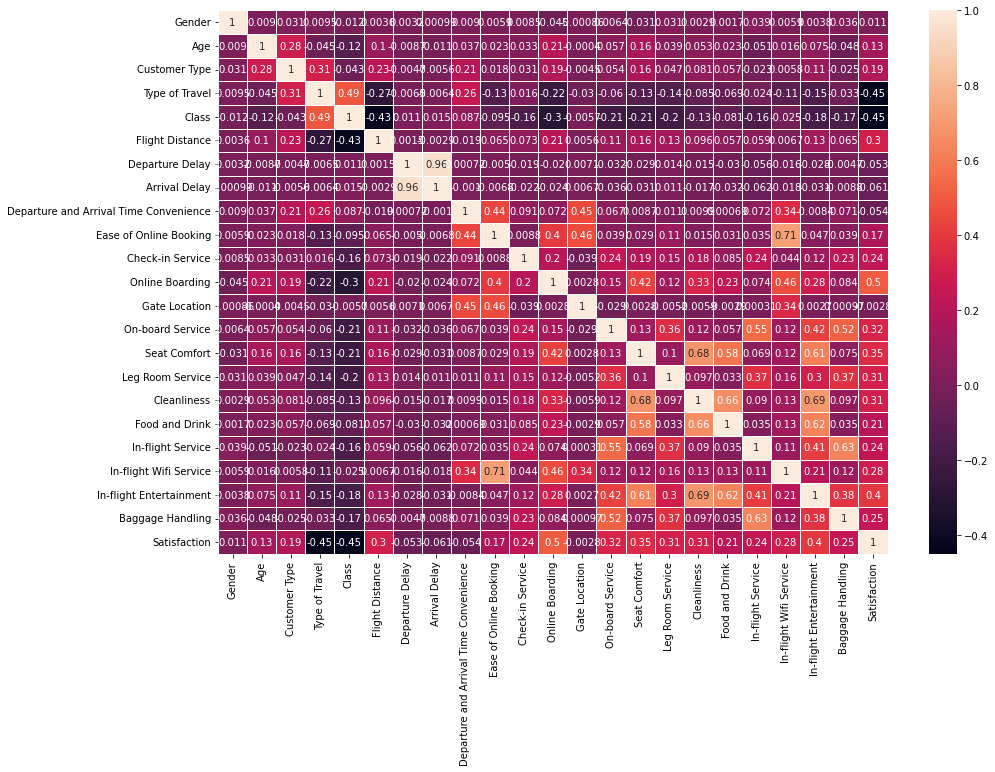

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15,10))
map1=sns.heatmap(correlation, annot=True, linewidth=1)#, cmap='coolwarm')
map1

In [321]:
features = df.drop(['Departure Delay','In-flight Wifi Service','Arrival Delay','Ease of Online Booking','Satisfaction'],axis=1)
y= df['Satisfaction']

In [322]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   Gender                                  129880 non-null  int32
 1   Age                                     129880 non-null  int64
 2   Customer Type                           129880 non-null  int32
 3   Type of Travel                          129880 non-null  int32
 4   Class                                   129880 non-null  int32
 5   Flight Distance                         129880 non-null  int64
 6   Departure and Arrival Time Convenience  129880 non-null  int64
 7   Check-in Service                        129880 non-null  int64
 8   Online Boarding                         129880 non-null  int64
 9   Gate Location                           129880 non-null  int64
 10  On-board Service                        129880 non-null  int64
 11  

In [323]:
from sklearn.model_selection import train_test_split

In [324]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.25, random_state = 0)

In [325]:
from sklearn.linear_model import LogisticRegression

In [342]:
#Performing logistic regression and the fitting the X_train and y_train and predicting the y_pred
logreg=LogisticRegression(random_state=0,max_iter=100)
logreg.fit(X_train,y_train)
print(logreg.score(X_test,y_test))
y_pred=logreg.predict(X_test)

0.8179550354173083


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [327]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [328]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [329]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[15129  3170]
 [ 2741 11430]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     18299
           1       0.78      0.81      0.79     14171

    accuracy                           0.82     32470
   macro avg       0.81      0.82      0.82     32470
weighted avg       0.82      0.82      0.82     32470



In [330]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32470 entries, 125669 to 34200
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Gender                                  32470 non-null  int32
 1   Age                                     32470 non-null  int64
 2   Customer Type                           32470 non-null  int32
 3   Type of Travel                          32470 non-null  int32
 4   Class                                   32470 non-null  int32
 5   Flight Distance                         32470 non-null  int64
 6   Departure and Arrival Time Convenience  32470 non-null  int64
 7   Check-in Service                        32470 non-null  int64
 8   Online Boarding                         32470 non-null  int64
 9   Gate Location                           32470 non-null  int64
 10  On-board Service                        32470 non-null  int64
 11  Seat Comfo

In [331]:
from sklearn.preprocessing import StandardScaler

In [332]:
feature_scaler=StandardScaler()
X_scaled = feature_scaler.fit_transform(features)
print(X_scaled)

[[ 1.01487815  0.56709443 -2.11228136 ...  1.15394588  1.23078662
   1.15920553]
 [-0.98533997 -0.29285985  0.47342178 ...  1.15394588  1.23078662
   1.15920553]
 [ 1.01487815  0.10404212  0.47342178 ... -0.5457739  -0.26841448
  -0.53568096]
 ...
 [ 1.01487815  0.17019245  0.47342178 ...  0.30408599 -0.26841448
   1.15920553]
 [ 1.01487815  0.69939509  0.47342178 ...  0.30408599 -0.26841448
   1.15920553]
 [-0.98533997 -1.2851148   0.47342178 ... -1.39563379 -1.01801503
  -2.23056744]]


In [333]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE  

In [334]:
# reference for SGD Classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_scaled, y)
Pipeline(steps=[('standardscaler', StandardScaler()),('sgdclassifier', SGDClassifier())])
# We are using 1000 iterations and tolernace value=0.001

# model = Pipeline([
#         ('balancing', SMOTE(random_state = 101)),
#         ('classification', SGDClassifier(loss = 'log', penalty = 'elasticnet', random_state = 1))
#     ])-----
# grid_param = {'classification__eta0': [.001,.01,.1,1], 'classification__max_iter' : [1000,2000,3000], 'classification__alpha': [.001, .01,.1, 1,], 'classification__l1_ratio': [0,0.5,1]}

# gd_sr = GridSearchCV(estimator=model, param_grid=grid_param, scoring='recall', cv=5)
# The above code is taking much time for fitting the X_scaled and y values. As there are more number of iterations,classification_alpha and calssfication ratio values.

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [335]:
clf.fit(X_scaled, y)
# fitting the X_scaled and y using SDGClassifier

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [336]:
score = clf.score(X_scaled, y)
print("Training score:", score) 
# printing the score using score function.

Training score: 0.8649599630428088
